# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we'll be analyzing data associated with movies released between 1960-2015. In particular we'll be interested in finding trends among several variables, by answering the following questions: 

    1.	Which genres receive the highest ratings?
    2.	Do movies with a longer runtime receive worse ratings than movies with a shorter runtime?
    3.	Do movies with higher budgets generally get better ratings than those with lower budgets?
    4.	What months do movies have the highest revenue?


The dataset and documentation  can be found here: 

[Movie Data](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv) 

[Documentation](https://www.kaggle.com/tmdb/tmdb-movie-metadata/kernels)

### 1. Importing the required libraries for data analysis

Below are the libraries we need for exploratory data analysis in this project

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### 2.  We load our dataset and print a few rows to get an idea of the data we're working with.

In [249]:
df_movies = pd.read_csv('tmdb_movies.csv')
df_movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.50,2015,137999939.30,1392445893.00
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.10,2015,137999939.30,348161292.50
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.30,2015,101199955.50,271619025.40


We have 21 columns of data to work with. Before we move on, here is a description of the columns to make it clear what each one represents:

| Column               | Description                                                                                                                                                                         |
|----------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                   | unique identifier in tmdb for each movie                                                                                                                                                    |
| imdb_id              | unique identifier in imdb for each movie                                                                                                                                            |
| popularity           | [popularity of movie on the tmdb website](https://developers.themoviedb.org/3/getting-started/popularity) |
| budget               | movie budget when it was released                                                                                                                                                   |
| revenue              | movie revenue                                                                                                                                                                       |
| original_title       | movie title                                                                                                                                                                         |
| cast                 | movie cast                                                                                                                                                                          |
| homepage             | movie website                                                                                                                                                                       |
| director             | movie director                                                                                                                                                                      |
| tagline              | movie catchphrase                                                                                                                                                                   |
| overview             | overview of movie plot                                                                                                                                                              |
| runtime              | movie length in minutes                                                                                                                                                             |
| genres               | list of genres the movie is included in                                                                                                                                             |
| production_companies | production companies for the movie                                                                                                                                                  |
| release_date         | date the movie was released                                                                                                                                                         |
| vote_count           | number of votes for the movie on tmdb                                                                                                                                               |
| vote_average         | average movie rating between 1-10                                                                                                                                                   |
| release_year         | year movie was released                                                                                                                                                             |
| budget_adj           | adjusted budget in terms of 2010 dollars, accounting for inflation over time                                                                                                        |
| revenue_adj          | adjusted revenue in terms of 2010 dollars, accounting for inflation over time                                                                                                       |

### 3. Then we run some functions to assess the data we're working with, and determine what data cleaning we need to do

In [250]:
# The shape function shows how many rows and columns we're working with
df_movies.shape

(10866, 21)

We can find out how many duplicated rows we have by using the duplicated and sum functions

In [251]:
# Getting the sum of duplicated rows in our datasetabs
df_movies.duplicated().sum()

1

With the info() function we can determine which columns are missing data, and whether our column data types make sense. Below we can see that we're missing data in the columns: imdb_id, 

In [252]:
# #•	Columns with missing data:
# 1.	Imdb_id
# 2.	Cast
# 3.	Homepage
# 4.	Director
# 5.	Tagline
# 6.	Keywords
# 7.	Overview
# 8.	Genres
# 9.	Production_companies

# •	Column data type that might need changing:
# 1.	Release date currently string, change to date

#
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [253]:
#https://stackoverflow.com/questions/41328633/how-do-i-print-entire-number-in-python-from-describe-function
#need to describe what this does. Before doing this my data showed decimals in the count column after the 1
#pd.set_option('float_format', '{:2f}'.format) - this option still had about 5 numbers after decimal
#the below option gives us 2 numbers after the decimal
pd.options.display.float_format = "{:.2f}".format

The describe function give us descriptive information about data in each columns and identifies potential outliers. Some of the things we need to address are: more than 50% of our movies have zero budget, revenue, or runtime listed, so these will not figure into answering our questions that require that criteria. 

In [254]:
# •	Rows that might need to be removed:
# 1.	Some rows have zero budget
# 2.	Some rows have zero revenue
# 3.	Some rows have zero runtime

df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.00


We also can remove columns we won't be using. Based on the questions we want to answer, we can drop certain columns from our dataset:
- id
- imdb_id
- popularity
- cast
- homepage
- tagline
- keywords
- overview

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [255]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

### 4. To begin the cleaning process we'll start with dropping the columns we won't be using for our analysis

In [256]:
df_movies.drop(['id', 'imdb_id', 'popularity', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'director', 'production_companies'], axis=1, inplace=True)

In [257]:
#confirm the columns have been dropped
df_movies.head(1)

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.50,2015,137999939.30,1392445893.00


In [258]:
#drop the duplicate row
df_movies.drop_duplicates(inplace=True)

In [259]:
#confirm no duplicates remain
df_movies.duplicated().sum()

0

In [260]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1018.6+ KB


In [261]:
#remove rows with missing values
#df_movies.dropna(inplace=True)

In [262]:
#confirm missing values dropped
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1018.6+ KB


In [263]:
#There are a lot of movies where the revenue is zero, so I want to look at the histograms for these movies
#to see if they fall into a particular group or groups. Most also had no budget. We can delete these rows
#df_movies[df_movies.revenue == 0].hist(figsize=(8, 8));

In [264]:
#get the indexes of movies with zero revenue
#zero_revenue_movies = df_movies[df_movies.revenue == 0].index

In [265]:
#drop movies with zero revenue
#df_movies.drop(zero_revenue_movies, inplace=True)

In [266]:
#re-check the shape to make sure the movies were dropped
#df_movies.shape

In [274]:
#looking at the genre rows that are null, I think dropping these rows would be best and won't have a significant effect on 
#our analysis
df_movies[df_movies['genres'].isnull()]

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
424,0,0,Belli di papÃ,100,NaN,2015-10-29,21,6.10,2015,0.00,0.00,10
620,0,0,All Hallows' Eve 2,90,NaN,2015-10-06,13,5.00,2015,0.00,0.00,10
997,0,0,Star Wars Rebels: Spark of Rebellion,44,NaN,2014-10-03,13,6.80,2014,0.00,0.00,10
1712,0,0,Prayers for Bobby,88,NaN,2009-02-27,57,7.40,2009,0.00,0.00,2
1897,0,0,Jonas Brothers: The Concert Experience,76,NaN,2009-02-27,11,7.00,2009,0.00,0.00,2
2370,0,0,Freshman Father,0,NaN,2010-06-05,12,5.80,2010,0.00,0.00,6
2376,0,0,Doctor Who: A Christmas Carol,62,NaN,2010-12-25,11,7.70,2010,0.00,0.00,12
2853,0,0,Vizontele,110,NaN,2001-02-02,12,7.20,2001,0.00,0.00,2
3279,0,0,ì•„ê¸°ì™€ ë‚˜,96,NaN,2008-08-13,11,6.10,2008,0.00,0.00,8
4547,0,0,London 2012 Olympic Opening Ceremony: Isles of...,220,NaN,2012-07-27,12,8.30,2012,0.00,0.00,7


In [277]:
#drop rows with missing values
df_movies.dropna(inplace=True)

In [278]:
#make sure missing values were removed
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 12 columns):
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null datetime64[ns]
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
release_month     10842 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 1.1+ MB


In [279]:
#need to separate month from date, create new column called month, and append the month there
#see case study 2 fixing data types pt 1 for extracting int from string
#see case study 1 appending data for saving values to a list and creating a new column to append them to

#used this stack overflow: https://stackoverflow.com/questions/51102615/get-month-from-date-column
#convert release_date column to Timestamp
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
#confirm change to timestamp
type(df_movies['release_date'][0])
#create release_month column and assign months to it
df_movies['release_month'] =  df_movies['release_date'].dt.month
#confirm month column created and data looks good
df_movies.head(5)

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.50,2015,137999939.30,1392445893.00,6
1,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.10,2015,137999939.30,348161292.50,5
2,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.30,2015,101199955.50,271619025.40,3
3,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.50,2015,183999919.00,1902723130.00,12
4,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.30,2015,174799923.10,1385748801.00,4


In [280]:
df_movies['primary_genre'] = df_movies['genres'].apply(lambda x: x.split("|")[0])

In [281]:
#need to separate the first genre name from the rest of the genres and append to primary genre column
#see case study 2 fixing data types part 2, to separate the first genre from the rest 
df_movies['primary_genre'] = df_movies['genres'].apply(lambda x: x.split("|")[0])

In [282]:
#confirm the new column was created and contains the first genre value from each row in the genres column
df_movies.head(5)

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,primary_genre
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.50,2015,137999939.30,1392445893.00,6,Action
1,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.10,2015,137999939.30,348161292.50,5,Action
2,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.30,2015,101199955.50,271619025.40,3,Adventure
3,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.50,2015,183999919.00,1902723130.00,12,Action
4,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.30,2015,174799923.10,1385748801.00,4,Action


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which genres receive the highest ratings?

In [432]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#get the average vote(rating) for each primary_genre
#used this stack overflow for as_index=False so can sort by vote_average column: 
#https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
genre_ratings_sorted = df_movies.groupby('primary_genre', as_index=False)['vote_average', 'vote_count'].mean()
genre_ratings_sorted.sort_values('vote_average', ascending=False)

,primary_genre,vote_average,vote_count
5,Documentary,6.92,34.65
12,Music,6.61,94.09
2,Animation,6.41,284.06
10,History,6.38,246.34
4,Crime,6.22,227.46
6,Drama,6.20,165.37
18,War,6.18,259.80
14,Romance,6.13,217.61
19,Western,6.08,184.52
1,Adventure,6.05,555.66


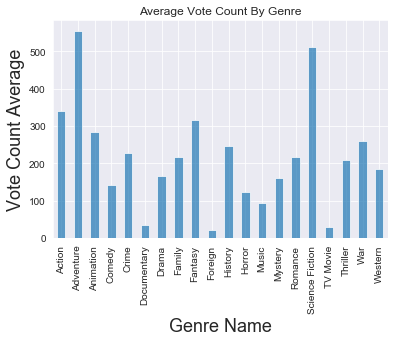

In [438]:
#wanted to show this two ways
genre_ratings_count = df_movies.groupby('primary_genre').vote_count.mean()
genre_ratings_count.plot(kind='bar', title='Average Vote Count By Genre', alpha=.7)

plt.xlabel('Genre Name', fontsize=18)
plt.ylabel('Vote Count Average', fontsize=18)
sns.set_style('darkgrid')

### Research Question 2: Do movies with a longer runtime receive worse ratings than movies with shorter runtime?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [337]:
#check descriptive stats on movie runtime
df_movies.runtime.describe()

count   10842.00
mean      102.14
std        31.29
min         0.00
25%        90.00
50%        99.00
75%       111.00
max       900.00
Name: runtime, dtype: float64

In [363]:
runtime_75th_percentile = df_movies['runtime'].quantile(.75)

In [439]:
runtime_greater = df_movies[df_movies['runtime'] > runtime_75th_percentile]

In [367]:
runtime_lesser = df_movies[df_movies['runtime'] < runtime_75th_percentile]

In [368]:
#vote_average for longer running movies
runtime_greater.vote_average.mean()

6.396565731166912

In [369]:
#vote_average for shorter running movies
runtime_lesser.vote_average.mean()

5.827433074806119

### Research Question 3: Do movies with higher budgets generally get better ratings than those with lower budgets?

In [370]:
df_movies.head(1)

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,primary_genre
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.50,2015,137999939.30,1392445893.00,6,Action


In [371]:
#as seen earlier, and confirmed below, there are some movies with no budget, so these will be removed from consideration for 
#answering this question
#I'm also using movies that have at least 1,000,000 in adjusted budget 
#I'll be using the adjusted budget column so all movies are considered equally
df_movies['budget_adj'].describe()

count       10842.00
mean     17587121.44
std      34334366.97
min             0.00
25%             0.00
50%             0.00
75%      20925067.03
max     425000000.00
Name: budget_adj, dtype: float64

In [389]:
#save only movies with a budget
with_budget = df_movies.query('budget_adj > 0')
with_budget.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,5168.00,5168.00,5168.00,5168.00,5168.00,5168.00,5168.00,5168.00,5168.00
mean,30745523.04,80306543.82,107.10,408.73,6.03,2001.26,36896201.75,102215038.01,6.92
std,38905828.47,159498035.24,22.81,788.37,0.88,11.77,41961884.28,195933200.51,3.40
min,1.00,0.00,0.00,10.00,1.50,1960.00,0.92,0.00,1.00
25%,6000000.00,0.00,93.00,35.75,5.50,1996.00,8102293.07,0.00,4.00
50%,17000000.00,21005371.50,103.00,122.00,6.10,2005.00,22722708.52,28648067.06,7.00
75%,40000000.00,89472514.00,117.00,402.00,6.60,2010.00,50083840.35,113426746.40,10.00
max,425000000.00,2781505847.00,540.00,9767.00,8.40,2015.00,425000000.00,2827123750.00,12.00


### Research Question 4: What months do movies have the highest revenue?

In [391]:
df_movies.head(1)

,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,primary_genre
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.50,2015,137999939.30,1392445893.00,6,Action


In [393]:
#there are movies without revenue so we'll delete those. also, we'll use adjusted revenue so everything is even
with_revenue = df_movies.query('revenue_adj > 0')
with_revenue.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,4849.00,4849.00,4849.00,4849.00,4849.00,4849.00,4849.00,4849.00,4849.00
mean,29569611.89,89238858.71,107.97,436.28,6.15,2000.92,35162081.53,115100887.63,6.96
std,40517612.64,162080146.41,21.11,806.49,0.80,11.57,43761166.89,198855667.98,3.36
min,0.00,2.00,15.00,10.00,2.10,1960.00,0.00,2.37,1.00
25%,1700000.00,7732325.00,95.00,46.00,5.60,1994.00,2329409.26,10465848.09,4.00
50%,15000000.00,31853080.00,104.00,147.00,6.20,2004.00,20328008.68,43956661.16,7.00
75%,40000000.00,99965753.00,117.00,435.00,6.70,2010.00,49735160.27,131648235.90,10.00
max,425000000.00,2781505847.00,705.00,9767.00,8.40,2015.00,425000000.00,2827123750.00,12.00


In [401]:
revenue_monthly = with_revenue.groupby('release_month', as_index=False).revenue_adj.sum()

In [404]:
revenue_monthly.sort_values('revenue_adj', ascending=False)

,release_month,revenue_adj
11,12,83493057786.48
5,6,80713223165.01
4,5,61683364497.60
6,7,58560370450.21
10,11,58498077766.77
2,3,40691921843.37
9,10,38445186532.90
7,8,32559895371.69
3,4,31653858380.24
8,9,30957858018.37


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!